# Titanic Challenge

![](https://i.imgur.com/rRFchA8.png)

* 이 내용은 타이타닉 수업의 보조자료로 만든 것입니다. 
* 커널부문 세계1위인 안드레이 룩야넨코의 노트북에 한글로 설명을 추가로 붙인 것에 다시 추가 연습을 붙인 것입니다.
* 한글본 복사해서 저장할 링크  https://www.kaggle.com/joshuajhchoi/titanic-tutorial-for-beginners-2020 
* 콜랩의 홈페이지 링크 https://colab.research.google.com/
* 깃허브의 홈페이지 링크 https://github.com/



## 초보자이신 경우 제일 아래 Part13 다음에 나와있는 보조자료 * 파이썬 기초 * 넘파이 기초 * 맷플롯리브기초 * 씨본 기초 * 판다스 기초를 먼저 보시는 것도 도움이 될 수 있습니다. 이는 강사의 자료는 아니고 초보자들을 위해 담당자가 준비했습니다. 

<a id = "table_of_contents"></a>
## Table of contents

[Part 1: 데이터 준비 및 모듈 임포트](#part1)			
[Part 2: 파일 병합](#part2)			
[Part 3: 파일 탐색](#part3)			
[Part 4: 데이터 탐구 (Exploratory Data Analysis)](#part4)			
[Part 5: Feature Engineering](#part5)	

[Part 6: 마지막 항목 결정](#part6)			
[Part 7: 머신러닝 모델 만들기](#part7)			
[Part 8: 중요도에 따라 모델 재 설정 ](#part8)			
[Part 9: 하이퍼 파라미터 튜닝](#part9)			
[Part 10: 모델 재 트레이닝](#part10)			

[Part 11: 마지막 보팅](#part11)	
[Part 12: 마지막 모델 예측](#part12)   
[Part 13: 제출](#part13)



<a id = "part1"></a>
## Part 1: 데이터 준비 및 모듈 임포트
[Go to the Table of Contents](#table_of_contents)

In [1]:
# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# 전처리 및 머신 러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# 경고 제거 (판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정합니다.)
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

### 중요 링크

[구글 콜랩](https://colab.research.google.com/) 

[깃헙브](https://github.com)

### 초보자이실 경우는 아래 링크 중 본인에게 맞는 것을 미리 공부해 보는 것도 도움이 됩니다.

[edx의 파이썬 기초수업](https://learn.edx.org/topic-python/?g_acctid=926-195-8061&g_campaign=gs-nonbrand-topic-python&g_campaignid=1535528542&g_adgroupid=58645176415&g_adid=405031374941&g_keyword=learn%20python%20online%20tutorial&g_keywordid=kwd-357260176984&g_network=g?utm_source=adwords&utm_campaign=1535528542&utm_medium=58645176415&utm_term=learn%20python%20online%20tutorial&gclid=CjwKCAjwwYP2BRBGEiwAkoBpAu6FTNidm90CEM1AJQGDn_mvW_bDMJSkWuWk6DnUJCrCXnG0-vW_aBoC8GwQAvD_BwE)

[파이썬 org에 나오는 파이썬 기초수업](https://docs.python.org/3/tutorial/)

[w3schools 파이썬 기초수업](https://www.w3schools.com/python/)

[Joshua Choi님의 파이썬 기초 문법 연습](https://joshua-mobile-choi-1756.trinket.io/python-3-4#/tasks/task-1-print-statement)

[Joshua Choi님의 타이타닉 판다스 101 사용 예](https://www.kaggle.com/joshuajhchoi/101-pandas-tips-for-beginners-titanic-en-kr)

[Joshua Choi님의 타이타닉 시각화 101 사용 예](https://www.kaggle.com/joshuajhchoi/101-data-visualization-tips-for-titanic-beginners)

[Seaborn연습](https://seaborn.pydata.org/tutorial/aesthetics.html)

### CSV to DF

* csv를 임포트하여 데이터셋이 판다스 데이터프레임이 되도록 합니다.

In [2]:
# 캐글에서는 아래와 같이 하나,  콜랩에서는 데이터를 캐글에서 다운로드 받으신 후  요 아래 방식으로 다시 불러 오셔야 합니다
# test = pd.read_csv('../input/titanic/test.csv')
# train = pd.read_csv('../input/titanic/train.csv')

# 이제 csv file들 (test & train)은 데이터 프레임이 되었습니다.

구글 콜랩에서 사용하실 때는 컴퓨터에 파일을 다운로드 한 후 아래 코드를 입력하면 불러올 수 있게 됩니다.

    from google.colab import files
    uploaded = files.upload()

그런 다음 아래 코드를 통해서 csv를 데이터프레임으로 바꿀 수 있게 됩니다.

    import io
    test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
    train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [3]:
import pandas as pd
# from google.colab import files
# uploaded = files.upload()

In [4]:
import io
# test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
# train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')


### 데이터프레임을 보는 다양한 방법

`head()`첫 5행을 볼 수 있습니다.

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
# head 빼면?
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


`tail()` 마지막 5행을 볼 수 있습니다.

In [11]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [13]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


`describe()` 각 열의 통계적인 면을 보여 줍니다. 

기본은 연속된 값을 가진 열만 보여주나 `include='all'로 세팅하면 모두 볼 수 있습니다.

In [14]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Mallet, Master. Andre",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# ()를 빼볼까요?
train.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

통계가 아니라 한 줄 한 줄 나오네요

`dtypes` 모든 열의 데이터 종류를 보여 줍니다.

In [17]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
# 이 것은 괄호를 넣으면 뭐가 나올까요?
# train.dtypes()

dtype은 Series라서 불러 올 수 없어서 error가 나온다. 즉 ()를 넣는다는 것은 각 행의 값들이 있어야 하는데 dtype은 그런 것이 아니므로 call을 할 수가 없다. 아래에 column같은 것도 call을 할 수 없는데 이는 인덱스의 역할을 하는 것이지 각 행별로 값을 가진 것이 아니라서 역시 에러가 나올 수 밖에 없다.

`info()` 는 `dtypes` 의 좀  더 발전된 개념으로 데이터 타입뿐만 아니라 빈칸이 아닌 갯수까지 보여 줍니다.

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


`columns`은 데이터 프레임의 열의 제목들을 보여 줍니다.

In [20]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

단순히 연습으로, 한 번 원하는 컬럼만 인덱싱해 보겠습니다.

인덱싱에 대해 더 공부하고 싶으시다면 아래 링크를 클릭하여 공부해 보세요.

[파이썬 인덱싱](https://joshua-mobile-choi-1756.trinket.io/python-3-4#/tasks/task-4-string-indexing)

[파이썬 리스트 인덱싱](https://joshua-mobile-choi-1756.trinket.io/python-3-4#/tasks/task-15-list-methods)

In [21]:
# 주의할 점은 파이썬은 처음 아이템이 0부터 시작하므로 [3]을 인덱싱하면 실제로는 4번째 것을 인덱싱하는 것이다
# [3:5]는 4번째 것[3]부터 여섯번 째 것[5] 이전을 의미한다. 따라서 이 경우에는 4번째, 5번째 것을 인덱싱하게 된다
train.columns[3], train.columns[3:5]

('Name', Index(['Name', 'Sex'], dtype='object'))

한 행 뿐만 아니라 여러행을 인덱싱 할 수도 있습니다.

In [22]:
# 따라서 아래 것은 6번재 행부터 21번째 직전 즉 20번째 까지를 인덱싱한다 (물론 행도 0부터 시작해서 행번호로는 5~19이다)
train[5:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


`shape` 은 행의 갯수와 열의 갯수를 보여 줍니다

In [23]:
train.shape

(891, 12)

<a id = "part2"></a>
## Part 2:  파일 병합
[Go to the Table of Contents](#table_of_contents)

* ntrain과 ntest의 shape을 확보해놓습니다. (병합 한 것을 나중에 다시 갈라 놓기 위한 준비)
* y_train은 알려진 결과 값이니 따로 모셔 놓고
* 테스트의 승객 아이디는 나중에 최종 결과에 넣을 것이기 때문에 따로 떼어 놓습니다.
* train과 test를 병합하여 data 란 파일을 만듭니다. 문자로 된 것을 숫자로 바꾼다든가. 숫자를 인터발 별로 그룹화 한다든가 할 때 한꺼번에 하기 위해 합해 놓습니다.

In [24]:
# 병합 준비
ntrain = train.shape[0]
ntest = test.shape[0]

# 아래는 따로 잘 모셔 둡니다.
y_train = train['Survived'].values
passId = test['PassengerId']

# 병함 파일 만들기
data = pd.concat((train, test))

# 데이터 행과 열의 크기는
print("data size is: {}".format(data.shape))

data size is: (1309, 12)


In [25]:
# ntrain이 어떻게 생겼나 볼까요?
ntrain

891

In [26]:
# ntest는?
ntest

418

In [27]:
y_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [28]:
passId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [29]:
# train과 test를 합친 data를 볼까요?
# test에서 "Survived"는 빈칸을 나타내는 NaN (Not a Number) 을 보여줍니다
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [30]:
# format을 간단히 연습합니다.
print ("I like {}".format('eggs'))

I like eggs


In [31]:
print ("I like {0} and {1}".format('eggs', 'spam'))

I like eggs and spam


In [32]:
print ("I like {1} and {0}".format('eggs', 'spam'))

I like spam and eggs


#### 파이썬의 프린트문과 포맷에 대해 보시려면 아래 링크를 클릭하세요.

[프린트문](https://joshua-mobile-choi-1756.trinket.io/python-3-4#/tasks/task-1-print-statement)

[포맷팅](https://joshua-mobile-choi-1756.trinket.io/python-3-4#/tasks/task-11-string-format)

In [33]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

'Survived" 말고 다른 것을 해볼까요?

In [34]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

트레인 데이터에 있는 인원 중 342명이 살아남고 549명이 사망했다는 것을 볼 수 있습니다.

<a id = "part3"></a>
## Part 3: 파일 탐색
[Go to the Table of Contents](#table_of_contents)

<AxesSubplot:>

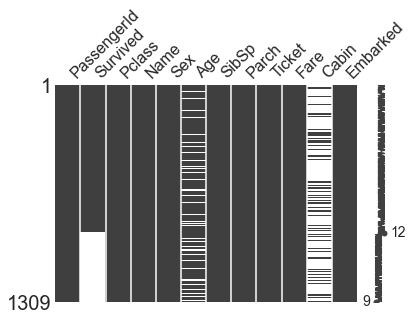

In [35]:
missingno.matrix(data, figsize = (6,4))

위 도표는 빈 값을 직관적으로 볼 수 있게 합니다.
아래 쪽 `Survived`가 비어 있는데 이 것은 테스트에 우리가 답으로 예측해야 하는 부분이라서 그렇 습니다.

In [36]:
data.isnull().sum() #비어 있는 값들을 체크해 본다.

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [37]:
data.isna().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

data.isnull.any() - 전체에 빈값이 있나 없나?  isna를 써도 같음 - 각 항목 별로

data.isnull.sum() - 전체 각 항목 중 빈칸이 몇 개나 있나?

data.isnull.any().any() - 전체에 빈값이 있나 없나? - 전체 True / False


In [38]:
data.Age.isnull().any()

True

열 이름을 보겠습니다.

In [39]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Features 항목

#### 항목의 종류 

* 범주형 항목 (Categorical Features)

범주형 항목은 법주형 변수로 된 항목으로 범주형 변수는 둘 이상의 결과 요소가 있는 변수이며 해당 기능의 각 값을 범주별로 분류 할 수 있습니다. 

예를 들어 성별은 두 가지 범주 (남성과 여성)의 범주 형 변수입니다. 

이산형 변수(discrete variable) = 범주형 변수 (categorical variable) 의 하나로 명목 변수 norminal variable 라고도합니다.

데이터 셋에서 명목 항목 : Sex, Embark 이며 우리는 Name, Ticket 등을 이로 변환해야 할 것 같습니다. 


* Ordinal Variable :

순위 변수는 범주 형의 하나지만 그 차이점은 값 사이의 상대 순서(=서열) 또는 정렬이 가능하다는 것입니다.

데이터 셋에서 순위 항목 : PClass 이며 우리는 Cabin을 이 범주로 변환해서 사용해야 할 것 같습니다.


* 연속형 항목 (Continuous Features):

서로 연속된 값을 가진 변수를 가진 항목이며 여기에서 우리는 연령을 대표적인 것으로 볼 수 있습니다.

Age, SipSp, Parch, Fare는 interval variable로 만들어 이에 적용해야 할 것 같습니다.

 

* 아래의 항목에서 열의 이름을 볼 수 있습니다.

          Variable          정의                Key

          survival          생존 여부            0 = No, 1 = Yes

          pclass            선실 등급            1 = 1st, 2 = 2nd, 3 = 3rd

          sex               성별    

          Age               나이  

          sibsp             형재 자매의 수/ 배우자 등이 승선한 경우 수    

          parch             부모나 자식과 같이 탄 경우 수   

          ticket            표 번호    

          fare              요금

          cabin             선실 번호   

          embarked          승선한 항구         C = Cherbourg, Q = Queenstown, S = Southampton

<a id = "part4"></a>
## Part 4: 데이터 탐구 (Exploratory Data Analysis)
[Go to the Table of Contents](#table_of_contents)

* train파일 순서대로 데이터 파일의 열들을 봅니다.

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 파일 각 열의 상관 관계를 보겠습니다.

Co-relation 매트릭스는 seaborn에서 변수 간 상관 계수를 보여주는 표입니다. 표의 각 셀은 두 변수 간의 상관 관계를 보여줍니다. 상관 매트릭스는 고급 분석에 대한 입력 및 고급 분석에 대한 진단으로 데이터를 요약하는 데 사용됩니다. 참고: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

아래 마스크 셋업은 0로 행렬을 상관 행렬과 같은 모양으로 만든 후 여기에 불리안 값을 넣고 이를 다시 True만 만듭니다.

triu 는 우측 상단 삼각행렬을 의미

annot= True는 각 셀에 숫자를 표시하라는 것이고, False는 하지 말라는 것이구요

이어서 이를 heatmap으로 런칭합니다.

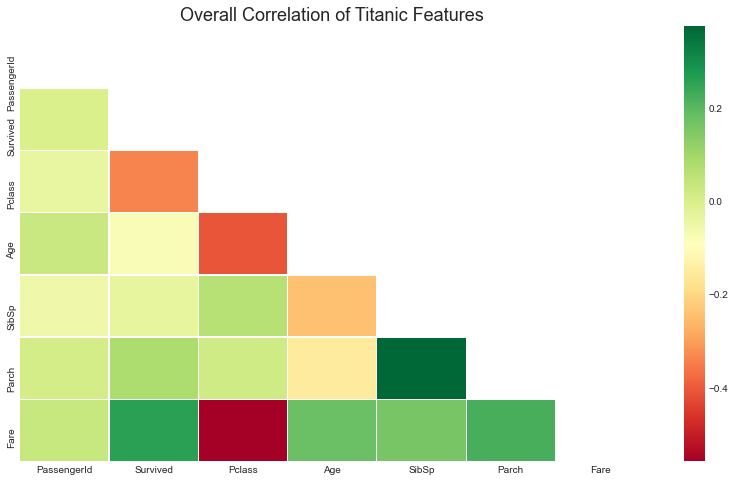

In [41]:
# Co-relation 매트릭스
corr = data.corr()
# 마스크 셋업
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# 그래프 셋업
plt.figure(figsize=(14, 8))
# 그래프 타이틀
plt.title('Overall Correlation of Titanic Features', fontsize=18)
#  Co-relation 매트릭스 런칭
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

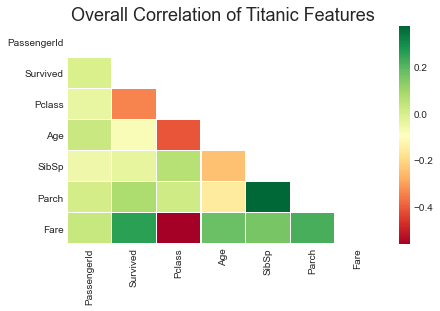

In [42]:
# Co-relation 매트릭스
corr = data.corr()
#변수 corr 에 data 데이터셋에 콜리레이션을 만드는 함수를 ( .corr()) 붙인 것을 넣었습니다.
# 마스크 셋업
mask = np.zeros_like(corr, dtype=np.bool)
# 여기에 0으로 된 매트릭스를 마스크에 붙입니다. 모양을 만드는 것이지요
# 앞에 보시면 corr에서 관계 숫자는 만들어졌고 mask 는 같은 모양의 매트릭스는 만들었는데 모두 0이 아니니 False로 뜨지요?
mask[np.triu_indices_from(mask)] = True
# 그래프 셋업
plt.figure(figsize=(7, 4))
# 그래프를 그릴 그림판을 만드는 것입니다
# 그래프 타이틀
plt.title('Overall Correlation of Titanic Features', fontsize=18)
#타이틀도 넣으니 뭔가 만들어 졌지요
#  Co-relation 매트릭스 런칭
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

* "Surived" 분석

한 열씩 검토해 보겠습니다.

Survived - Key: (0 - Not Survived, 1- Survived)

Survived는 수자로 값을 주지만 Categorical Variable인 셈입니다.

죽던지 살던지 둘 중 하나의 값을 줍니다.

countplot을 그려 봅니다.

사이즈는 가로 10인치 세로 2인치

생존 여부 0과 1의 숫자를 세어 본 후 그림을 그리도록 명령을 하는 것입니다.

pyplot(plt)의 figure라는 메소드를 써서 그림판의 크기를 정하고, seaborn의 카운트플롯을 그리라는 것입니다.

0    549
1    342
Name: Survived, dtype: int64


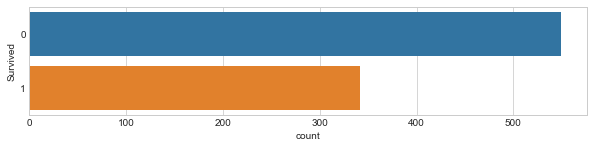

In [43]:
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

* 불행히도 사망자가 훨씬 많아 보입니다.
* 전체 사망자 비율을 좀 보겠습니다.

* 파이그래프랑 카운트 플롯을 서브플롯으로 그립니다.
* 행은 하나 열은 2개의 서브 플롯입니다. 사이즈는 가로 15인치 세로 6인치
* 'Survived'의 값을 카운트해서 파이플롯을 만듭니다.
* explode는 폭발하는 것이니까 1이면 튀어 나가는 것인데 0을 주면 분리만 되고 돌출은 되지 않습니다. 이어서 0, 1인 것은 첫 번째 것은 아니고 두번 째 것은 분리된다는 의미로 생각하시면 됩니다.
* autopercent는 1.1이 표현하는 부분은 소수점 한 자리까지 보여 주라는 의미입니다. 뒤에 점 이하가 4면 둘 다 소수점 4자리수 까지 보여 줍니다.
* ax[0]은 첫번째 칸입니다.
* set_title 메소드는 서브 플롯의 제목을 보여 줍니다.

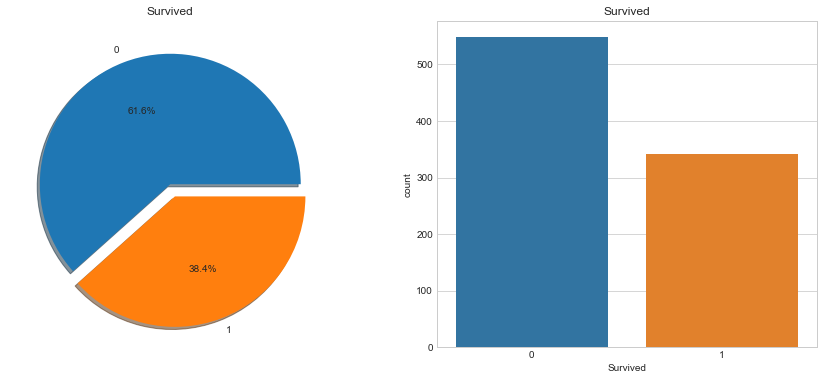

In [44]:
f,ax=plt.subplots(1, 2, figsize=(15, 6))
train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

* 위의 것을 아래와 같이 함수로 만들겠습니다. (물론 자주 쓰이지는 않겠지만 연습이니)

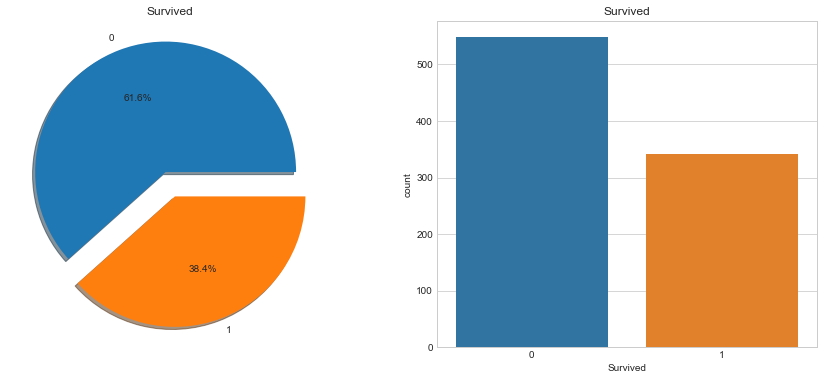

In [45]:
def piecount(col):
    f, ax = plt.subplots(1, 2, figsize=(15, 6))
    train[col].value_counts().plot.pie(explode=[0.1 for i in range(train[col].nunique())], autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(col)
    ax[0].set_ylabel('')
    sns.countplot(col, data=train, ax=ax[1])
    ax[1].set_title(col)
    plt.show()

piecount('Survived')

[함수 만들기 공부](https://trinket.io/joshua-mobile-choi-1756/courses/python-3-4#/tasks/task-20-making-functions)

[파라미터와 아규먼트 공부](https://trinket.io/joshua-mobile-choi-1756/courses/python-3-4#/tasks/task-21-parameters-and-arguments)

* "Pclass" 분석

* Pclass는 값이 숫자이나 서열이 정해진 Ordinal Feature이다.
* Key:1 = 1st, 2= 2nd, 3 = 3rd
* 각 클래스 당 생존자를 보겠습니다.

In [46]:
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [47]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


* 1등급 객실의 사람들은 생존자가 더 많고, 2등급은 생존자에 비해 사망자가 조금 더 많으나, 3등급은 사망자가 3배 이상 많다는 것을 알 수 있습니다.

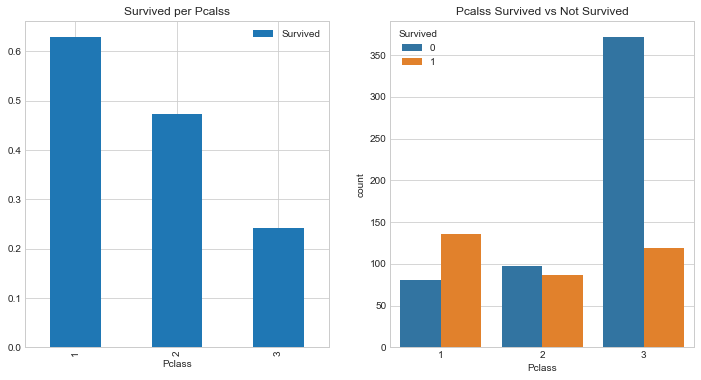

In [48]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived per Pcalss')
sns.countplot('Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pcalss Survived vs Not Survived')
plt.show()

* 위에 만든 함수를 한 번 써 먹어 볼까요?

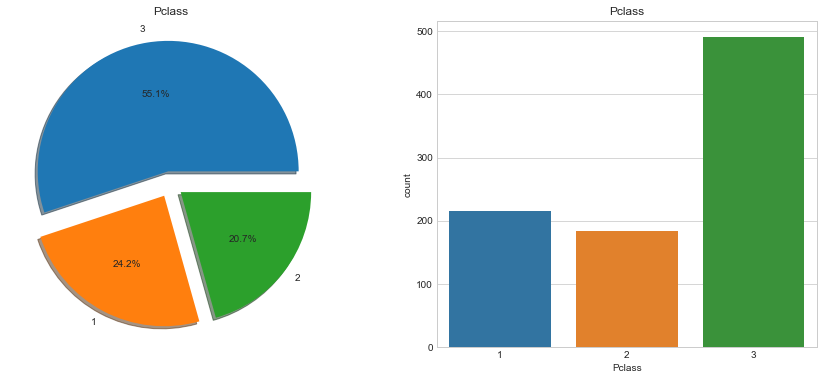

In [49]:
piecount("Pclass")

* %는 3등칸이 반이 넘으나 위의 그래프에서 생존자는 1등석이 가장 많다는 것을 알 수 있습니다.
* 각 클래스 당 생존률을 볼까요?

### "Name" 분석
* 이름은 거의 모두 다를 가능성이 큽니다. Family Name, First Name, Middle Name and even Dr. Capt, master and so on 모두 감안하면...
* 분류를 한 번 해 봅니다.
* 리스트를 한 번 주 욱 보겠습니다.

In [50]:
data.Name.value_counts()

Connolly, Miss. Kate                      2
Kelly, Mr. James                          2
Mallet, Master. Andre                     1
Mangan, Miss. Mary                        1
Rogers, Mr. Reginald Harry                1
                                         ..
Hipkins, Mr. William Edward               1
Ryerson, Miss. Susan Parker "Suzette"     1
Coutts, Master. William Loch "William"    1
Pokrnic, Mr. Mate                         1
McKane, Mr. Peter David                   1
Name: Name, Length: 1307, dtype: int64

* 이름은 언뜻 보아서 감이 안 옵니다. 중간에 있는 Mr. 같은 호칭을 볼까요.
* ['Initial']이란 열을 새로 만들어서 여기에 Name에서 추출한 Regular Expression을 넣습니다.
* 아래에서 str.extract('([A-Za-z]+).')부분은 str에서 대문자 A~Z, 소문자 a~z 중에 . 명령을 통해 .으로 끝나는 부분을 추출해 내는 것입니다.
* ('^([A-Za-z]+)')으로 하면 처음에 나오는 문자 덩어리가 될 것이고 +를 빼면 첫 스펠링 한캐릭터만 추출합니다.

[Regex 공부](http://)

* 안전을 위해 카피를 하나 만들어서 새로운 항목을 만들어 봅니다.

In [51]:
temp = data.copy()
temp['Initial'] = 0
temp['Initial'] = data.Name.str.extract('([A-Za-z0-9]+)\.')

Miss나 Mr등은 많으나 익숙하지 않은 몇 개가 보입니다.

In [52]:
temp['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Countess      1
Jonkheer      1
Mme           1
Sir           1
Capt          1
Lady          1
Dona          1
Don           1
Name: Initial, dtype: int64

이를 성별로 봅니다.

In [53]:
pd.crosstab(temp.Initial, temp.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


* 생존률로 봅니다.

* 생존율 함수를 만들어 보겠습니다.

In [54]:
def survpct(col):
    return temp.groupby(col)['Survived'].mean()

survpct('Initial')

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

* 생존 숫자로 봅니다.

* test 에 있는 Dona의 나이를 보고 어디에 넣을지 보겠습니다.
* Ms. 는 현대처럼 Miss + Mrs를 합친 말이 아니라 당시에는 귀족미망인을 의미하는 것이 었습니다. Mlle나 Mme등도 마드모아젤과 마담의 줄인말일 경우일 것입니다. 귀족 여성들로 보아야겠죠.

In [55]:
temp['LastName'] = data.Name.str.extract('([A-Za-z]+)')

In [56]:
pd.crosstab(temp.LastName, temp.Survived).T.style.background_gradient(cmap='summer_r')

LastName,Abbing,Abbott,Abelson,Adahl,Adams,Ahlin,Aks,Albimona,Alexander,Alhomaki,Ali,Allen,Allison,Allum,Andersen,Anderson,Andersson,Andreasson,Andrew,Andrews,Angle,Appleton,Arnold,Artagaveytia,Asim,Asplund,Astor,Attalah,Aubart,Augustsson,Ayoub,Backstrom,Baclini,Badt,Bailey,Balkic,Ball,Banfield,Barah,Barbara,Barber,Barkworth,Barton,Bateman,Baumann,Baxter,Bazzani,Beane,Beavan,Becker,Beckwith,Beesley,Behr,Bengtsson,Berglund,Berriman,Betros,Bidois,Bing,Birkeland,Bishop,Bissette,Bjornstrom,Blackwell,Blank,Bonnell,Bostandyeff,Boulos,Bourke,Bowen,Bowerman,Bracken,Bradley,Braund,Brewe,Brocklebank,Brown,Bryhl,Burke,Burns,Buss,Butler,Butt,Byles,Bystrom,Cacic,Cairns,Calderhead,Caldwell,Calic,Cameron,Campbell,Canavan,Cann,Caram,Carbines,Cardeza,Carlsson,Carr,Carrau,Carter,Cavendish,Celotti,Chaffee,Chambers,Chapman,Charters,Cherry,Chibnall,Chip,Christmann,Christy,Chronopoulos,Clarke,Cleaver,Clifford,Coelho,Cohen,Coleff,Coleridge,Collander,Colley,Collyer,Compton,Connaghton,Connolly,Connors,Cook,Cor,Corn,Coutts,Coxon,Crease,Cribb,Crosby,Culumovic,Cumings,Cunningham,Dahl,Dahlberg,Dakic,Daly,Danbom,Daniel,Danoff,Dantcheff,Davidson,Davies,Davis,Davison,Dean,Denkoff,Dennis,Devaney,Dick,Dimic,Dodge,Doharr,Doling,Dooley,Dorking,Douglas,Dowdell,Downton,Drazenoic,Drew,Duane,Duff,Duran,Edvardsson,Eitemiller,Eklund,Ekstrom,Elias,Elsbury,Emanuel,Emir,Endres,Eustis,Fahlstrom,Farrell,Farthing,Faunthorpe,Fischer,Fleming,Flynn,Foo,Ford,Foreman,Fortune,Fox,Francatelli,Frauenthal,Frolicher,Frost,Fry,Funk,Futrelle,Fynney,Gale,Gallagher,Garfirth,Garside,Gaskell,Gavey,Gee,Gheorgheff,Giglio,Giles,Gilinski,Gill,Gillespie,Gilnagh,Givard,Glynn,Goldenberg,Goldschmidt,Goldsmith,Goncalves,Goodwin,Graham,Green,Greenberg,Greenfield,Gronnestad,Guggenheim,Gustafsson,Haas,Hagland,Hakkarainen,Hale,Hamalainen,Hampe,Hanna,Hansen,Harder,Harknett,Harmer,Harper,Harrington,Harris,Harrison,Hart,Hassab,Hassan,Hawksford,Hays,Healy,Hedman,Hegarty,Heikkinen,Heininen,Hendekovic,Henry,Herman,Hewlett,Hickman,Hippach,Hirvonen,Hocking,Hodges,Hogeboom,Hold,Holm,Holverson,Homer,Honkanen,Hood,Horgan,Hosono,Hoyt,Humblen,Hunt,Ibrahim,Icard,Ilett,Ilmakangas,Isham,Ivanoff,Jacobsohn,Jalsevac,Jansson,Jardin,Jarvis,Jenkin,Jensen,Jermyn,Jerwan,Johannesen,Johanson,Johansson,Johnson,Johnston,Jonkoff,Jonsson,Jussila,Kallio,Kalvik,Kantor,Karaic,Karlsson,Karun,Kassem,Keane,Keefe,Kelly,Kent,Kenyon,Kiernan,Kilgannon,Kimball,Kink,Kirkland,Klaber,Klasen,Knight,Kraeff,Kvillner,Lahoud,Lahtinen,Laitinen,Laleff,Lam,Landergren,Lang,Laroche,Larsson,LeRoy,Leader,Leeni,Lefebre,Lehmann,Leinonen,Leitch,Lemberopolous,Lemore,Lennon,Leonard,Lester,Lesurer,Levy,Lewy,Leyson,Lievens,Lindahl,Lindblom,Lindell,Lindqvist,Lines,Ling,Lobb,Long,Longley,Louch,Lovell,Lulic,Lundahl,Lurette,Mack,Madigan,Madill,Madsen,Maenpaa,Maioni,Maisner,Mallet,Mamee,Mangan,Mannion,Marechal,Markoff,Markun,Marvin,Masselmani,Matthews,Mayne,McCarthy,McCormack,McCoy,McDermott,McEvoy,McGough,McGovern,McGowan,McKane,McMahon,McNamee,Meanwell,Meek,Mellinger,Mellors,Meo,Mernagh,Meyer,Millet,Milling,Minahan,Mineff,Mionoff,Mitchell,Mitkoff,Mockler,Moen,Molson,Montvila,Moor,Moore,Moran,Moraweck,Morley,Morrow,Moss,Moubarek,Moussa,Moutal,Mudd,Mullens,Murdlin,Murphy,Myhrman,Naidenoff,Najib,Nakid,Nankoff,Nasser,Natsch,Navratil,Nenkoff,Newell,Newsom,Nicholls,Nicholson,Nicola,Nilsson,Nirva,Niskanen,Norman,Nosworthy,Novel,Nye,Nysten,Nysveen,O,Odahl,Ohman,Olsen,Olsson,Olsvigen,Oreskovic,Osen,Osman,Ostby,Otter,Padro,Pain,Palsson,Panula,Parkes,Parr,Parrish,Partner,Pasic,Patchett,Paulner,Pavlovic,Pears,Peduzzi,Pekoniemi,Penasco,Pengelly,Perkin,Pernot,Perreault,Persson,Peter,Peters,Petranec,Petroff,Petterson,Pettersson,Peuchen,Phillips,Pickard,Pinsky,Plotcharsky,Ponesell,Porter,Potter,Quick,Radeff,Razi,Reed,Reeves,Rekic,Renouf,Reuchlin,Reynaldo,Rice,Richard,Richards,Ridsdale,Ringhini,Rintamaki,Risien,Robbins,Robert,Robins,Roebling,Rogers,Romaine,Rommetvedt,Rood,Rosblom,Ross,Rothes,Rothschild,Rouse,Rugg,Rush,Ryan,Ryerson,Saad,Saalfeld,Sadlier,Sage,Sagesser,Salkjelsvik,Salon

* 이제 우리는 Initial에서 Mr.등의 호칭을 뽑아내었고, 성을 뽑아내었습니다.

* 머신이 알파벳보다는 숫자를 좋아 하므로 숫자로 바꿉니다.

* 아, 그러기 전에 Dona를 처리해야지요.

In [57]:
temp.loc[temp['Initial'] == 'Dona']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,Dona,Oliva


* 나이로 추측해서 Mrs.로 넣습니다.
* 결측치를 처리하는 방법은 많으나 이렇게 하나일 경우에는 가장 적절한 추측을 사용하여 넣는 것도 괜찮습니다.

In [58]:
temp.loc[temp['Initial'] == 'Dona', 'Initial'] = 'Mrs'

In [59]:
pd.crosstab(temp.Initial, temp.Survived).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1.0,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


* Last name 은 전부 숫자로 바꿉니다.

In [60]:
temp['NumName'] = temp['LastName'].factorize()[0]

In [61]:
pd.crosstab(temp.NumName, temp.Survived).T.style.background_gradient(cmap='summer_r')

NumName,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,2,0,0,1,1,2,1,4,3,1,0,0,1,7,1,0,5,4,4,0,1,0,0,0,1,1,2,5,1,1,0,0,1,2,1,0,1,0,1,2,1,1,0,1,1,1,2,6,1,1,0,1,0,0,1,1,6,1,0,2,6,1,0,0,1,1,1,1,1,0,1,1,1,0,0,1,0,0,1,0,1,4,1,1,1,1,1,1,1,1,1,0,0,1,1,2,2,3,4,1,0,0,1,1,2,1,2,2,1,1,1,3,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,3,0,1,1,1,1,1,1,1,1,1,2,3,0,1,1,7,1,0,1,2,1,0,1,1,4,1,3,1,4,1,1,1,1,0,1,0,3,1,0,1,0,1,0,1,0,1,2,1,1,0,2,0,0,0,2,0,1,1,1,1,0,1,0,0,1,1,1,1,1,0,1,1,2,1,1,1,1,1,1,1,0,1,1,1,1,0,0,2,1,1,2,2,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,1,0,1,1,1,1,1,2,1,0,1,1,0,0,0,0,1,1,1,1,1,2,0,1,0,1,0,1,1,0,0,0,1,1,2,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,1,1,3,1,1,0,1,0,0,1,2,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,2,0,1,0,0,1,1,0,0,1,2,1,1,0,1,1,1,0,1,0,0,1,1,1,1,2,1,0,0,2,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,2,1,0,1,0,1,0,0,0,2,1,1,1,1,1,1,1,1,2,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,2,1,1,0,0,0,0,0,0,0,2,1,0

In [62]:
temp.loc[temp['NumName'] == 27]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss,O,27
47,48,1.0,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q,Miss,O,27
186,187,1.0,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,Mrs,O,27
364,365,0.0,3,"O'Brien, Mr. Thomas",male,NaN,1,0,370365,15.5000,NaN,Q,Mr,O,27
459,460,0.0,3,"O'Connor, Mr. Maurice",male,NaN,0,0,371060,7.7500,NaN,Q,Mr,O,27
502,503,0.0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q,Miss,O,27
552,553,0.0,3,"O'Brien, Mr. Timothy",male,NaN,0,0,330979,7.8292,NaN,Q,Mr,O,27
629,630,0.0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,Mr,O,27
653,654,1.0,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.8292,NaN,Q,Miss,O,27
88,980,NaN,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.7500,NaN,Q,Ms,O,27


* 보시다시피 같은 Last name에 같은 번호가 쓰여졌다.

* 끝에 [0]은 라벨만 보고 번호를 붙이는 것으로 정말 unique한 것이란 것은 안 본다는 것입니다.
 
* 자 이제 이름을 의미하는 중요한 요소 두 개를 숫자로 바꾸었으니 다음으로 갑니다.

### "Sex" 분석

* 함수를 만들어서 train파일을 보지요

In [63]:
train[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


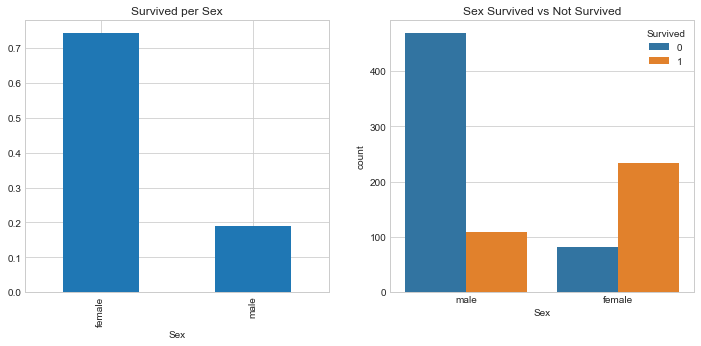

In [64]:
def bag(col, target, title, title1):
    f,ax=plt.subplots(1,2,figsize=(12,5))
    train.groupby([col])[target].mean().plot(kind='bar', ax=ax[0])
    ax[0].set_title(title)
    sns.countplot(col, hue=target, data=train, ax=ax[1])
    ax[1].set_title(title1)
    plt.show()

bag('Sex','Survived','Survived per Sex','Sex Survived vs Not Survived')

* 배에 있던 남자의 수는 여자의 수보다 훨씬 많습니다. 여전히 생존 여성 수는 남성 수의 거의 두 배입니다. 선박 여성의 생존율은 약 75 % 인 반면 남성의 생존율은 약 18-19 %입니다.
 
* 이 것은 남성/여성을 1,2로 나누면 될 것 같은 뻔해 보이는 것이지만 좀 더 새분화하면 좋아 보입니다.
* 예를 들어 아기들은 아기이지, 남자인지 여자인지 구명보트 태울 때 안 물어 볼 것이기 때문입니다.
* 오히려 (불행하게도) 귀족 아기인지 서민의 아기인지는 행과불행을 가를 수 있습니다 ㅠㅠ
* 생존 Pclass별로 성별을 봅니다.

In [65]:
pd.crosstab([train.Sex, train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

* 사회는 불공평 했으나 최소한 남자들의 신사도는 있었다고 할 수 있을 것 같습니다.

* "Sex" 항목을 다음과 같이 나누어 보는 것도 괜찮을 것입니다.
* 다 해보신 다음에 다시 하실 때 시도해 보세요

In [66]:
# temp['Gender'] = 0
# temp.loc[(temp['Sex']=='male') & (temp[Pclass]== 1) ,'Gender']= 1
# temp.loc[(temp['Sex']=='male') & (temp[Pclass]== 2) ,'Gender']= 2
# temp.loc[(temp['Sex']=='male') & (temp[Pclass]== 3) ,'Gender']= 2
# temp.loc[(temp['Sex']=='female') & (temp[Pclass]== 1) ,'Gender']= 3
# temp.loc[(temp['Sex']=='female') & (temp[Pclass]== 2) ,'Gender']= 4
# temp.loc[(temp['Sex']=='female') & (temp[Pclass]== 3) ,'Gender']= 5
# temp.loc[temp['Age']<1.0 ,'Gender']= 6

### Age 분석
 
* Age는 Continuous한 값입니다.
* 빈칸이 많아서 빈칸처리가 결정적인 역할을 할 것 같습니다.
 
* Age의 최대, 최소, 중간을 보겠습니다.

In [67]:
print('Oldest Passenger was', data['Age'].max(), 'Years')
print('Youngest Passenger was', data['Age'].min(), 'Years')
print('Average Age on the ship was', int(data['Age'].mean()), 'Years')

Oldest Passenger was 80.0 Years
Youngest Passenger was 0.17 Years
Average Age on the ship was 29 Years


* ‘math’ module 을 사용해 보겠습니다.
* 우선 math module 을 import 해야 합니다
* 다음 5개의 함수를 배워 봅니다: ceil, floor, max, min, mean

* ceil()      # '올림' 의 기능을 합니다.
* floor()     # '내림' 의 기능을 합니다.
* max()       # 주어진 숫자 중에서 가장 큰 값을 보여 줍니다.
* min()       # 주어진 숫자 중에서 가장 작은 값을 보여 줍니다
* mean()      # 평균 값을 보여줍니다 / 위의 4개와 사용법이 다릅니다



In [68]:
import math               

print (math.ceil(0.5))  
         
print (math.floor(0.5))  

print (max([1, 2, 3]))
print (max('Chevrolet'))

print (min([1, 2, 3]))
print (min('Chevrolet'))

from statistics import mean
a=[5,2,3,2]
avg=mean(a)
print(avg)

1
0
3
v
1
C
3


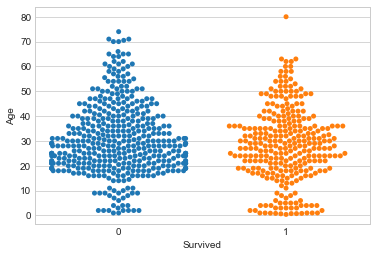

In [69]:
sns.swarmplot(x=train['Survived'], y=train['Age'])
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

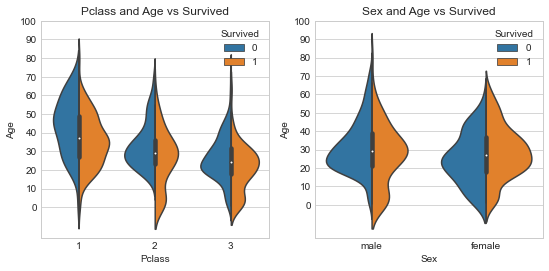

In [70]:
f, ax = plt.subplots(1,2,figsize=(9,4))
sns.violinplot("Pclass", "Age", hue="Survived", data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex","Age", hue="Survived", data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

#### 관찰 :

1) Pclass에 따라 어린이 수가 증가하고 10 세 미만의 어린이 (즉, 어린이)의 생존율은 Pclass에 상관없이 양호해 보입니다.

2) Pclass1에서 20-50세의 Passeneger의 생존 가능성은 높고 여성에게는 더 좋습니다.

3) 남성의 경우 생존 확률은 나이가 증가함에 따라 감소합니다.


우선 age의 빈칸 부터 해결 합니다.

앞에서 살펴본 것처럼 Age 항목에는 177 null 값이 있습니다. 이러한 NaN 값을 대체하기 위해 데이터 집합의 평균 수명을 지정할 수 있습니다.

그러나 문제는 평균 연령이 29 세를 4세 아이에게 할당 할 수 없습니다. 승객이 어떤 연령대에 있는지 알 수있는 방법이 있을까요? 이름에서 힌트를 찾아 봅니다.

* 그리고 Initial 별 평균 연령을 보고 Age에 적용 시키는 것이 좋을 것 같습니다.

In [71]:
temp.groupby('Initial').agg({'Age': ['mean', 'count']}) #이니셜 별 평균 연령 체크

Age      
               mean count
Initial                  
Capt      70.000000     1
Col       54.000000     4
Countess  33.000000     1
Don       40.000000     1
Dr        43.571429     7
Jonkheer  38.000000     1
Lady      48.000000     1
Major     48.500000     2
Master     5.482642    53
Miss      21.774238   210
Mlle      24.000000     2
Mme       24.000000     1
Mr        32.252151   581
Mrs       37.005848   171
Ms        28.000000     1
Rev       41.250000     8
Sir       49.000000     1

In [72]:
# 이니셜 별 평균 연령을 빈값에 넣어 봅니다.

temp = temp.reset_index(drop=True)

temp['Age'] = temp.groupby('Initial')['Age'].apply(lambda x: x.fillna(x.mean()))

temp[31:50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,37.005848,1,0,PC 17569,146.5208,B78,C,Mrs,Spencer,30
32,33,1.0,3,"Glynn, Miss. Mary Agatha",female,21.774238,0,0,335677,7.7500,NaN,Q,Miss,Glynn,31
33,34,0.0,2,"Wheadon, Mr. Edward H",male,66.000000,0,0,C.A. 24579,10.5000,NaN,S,Mr,Wheadon,32
34,35,0.0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,NaN,C,Mr,Meyer,33
35,36,0.0,1,"Holverson, Mr. Alexander Oskar",male,42.000000,1,0,113789,52.0000,NaN,S,Mr,Holverson,34
36,37,1.0,3,"Mamee, Mr. Hanna",male,32.252151,0,0,2677,7.2292,NaN,C,Mr,Mamee,35
37,38,0.0,3,"Cann, Mr. Ernest Charles",male,21.000000,0,0,A./5. 2152,8.0500,NaN,S,Mr,Cann,36
38,39,0.0,3,"Vander Planke, Miss. Augusta Maria",female,18.000000,2,0,345764,18.0000,NaN,S,Miss,Vander,18
39,40,1.0,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,Miss,Nicola,37
40,41,0.0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.000000,1,0,7546,9.4750,NaN,S,Mrs,Ahlin,38


* 람다 함수의 기본을 봅니다

파이썬의 람다(lambda) 함수는 런타임에 생성해서 사용할 수 있는 익명 함수 입니다. 

일반적인 함수와 같이 정의해두고 쓰는 것이 아니고 필요한 곳에서 간단한 기능을 

즉시 사용하고 버릴 수 있는 함수입니다.

In [73]:
# 단순 계산
a = 2        
b = 2
print (a ** b)

4


In [74]:
# 이를 함수로 만든다면
def sample(a,b):
    print(a ** b)

sample(2,2)

4


In [75]:
# 이를 람다로 만들면
a = lambda x, y: x ** y
print (a(2,2))


4


이 것은 간단한 것이지만 반복되는 단순한 계산 등에서는 람다가 유용합니다.

In [76]:
#다른 샘플을 봅니다
sample1 = lambda x,y,z: x+y+z
print (sample1(1,2,3))


def sample1(x,y,z):
    n= x+y+z
    print (n)
    
sample1(1,2,3)

sample2 = lambda x,y,z: x*y*z
print (sample2(1,2,3))

z = (lambda x,y: x+y) (10,20) 
print (z)

6
6
6
30


In [77]:
# 다른 예를 봅니다
y = lambda x: x**3
print (y(7))

z = (lambda x,y: x**3+y**3) (3,4) 
print (z)

z = (lambda x,y: x**3+y**3) 
print (z(3,4))

343
91
91


In [78]:
# 짝수 홀수 를 가려내는 것을 for loop - continue와 람다랑 비교해 보겠습니다.
for num in range(1, 3):
	if num % 2 == 0:
		print (num)
		continue
for num in range(1, 3):
	if num % 2 == 1:
		print (num)
		continue


print ((lambda x, y: x if x % 2 == 0 else y)(1,2))
print ((lambda x, y: x if x % 2 == 1 else y)(1,2))

mylist = list(range(1, 3))
print (list(filter(lambda n:n % 2 == 0 , mylist)))
print (list(filter(lambda n:n % 2 == 1 , mylist)))

2
1
2
1
[2]
[1]


In [79]:
# 람다의 map 함수를 해봅니다.
print (list(map(lambda x: x ** 2, [5,6,7,8,9])))

[25, 36, 49, 64, 81]


In [80]:
#람다의 filter 함수를 해봅니다.
mylist =  [1, 2, 3]
print (list(filter(lambda x: x > 2, mylist)))

[3]


[람다함수 공부](https://trinket.io/joshua-mobile-choi-1756/courses/python-3-4#/tasks/task-34-lambda)

[람다함수 메소드](https://trinket.io/joshua-mobile-choi-1756/courses/python-3-4#/tasks/task-35-lambda-and-functions)

* 이제 Initial을 좀 정리합니다.

In [81]:
temp['Initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona' , 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',  'Miss'  ,'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'], ['Sacrificed', 'Respected', 'Nobles', 'Mr', 'Mrs', 'Respected', 'Mr', 'Nobles', 'Respected', 'Kids', 'Miss', 'Nobles', 'Nobles', 'Mr', 'Mrs', 'Nobles', 'Sacrificed', 'Nobles'],inplace=True)
temp['Initial'].replace(['Kids', 'Miss', 'Mr', 'Mrs', 'Nobles', 'Respected', 'Sacrificed'], [4, 4, 2, 5, 6, 3, 1], inplace=True)

In [82]:
temp['Age_Range'] = pd.qcut(temp['Age'], 10)

In [83]:
survpct('Age_Range')

Age_Range
(0.169, 16.0]     0.548077
(16.0, 21.0]      0.307692
(21.0, 23.0]      0.487179
(23.0, 26.0]      0.369863
(26.0, 30.0]      0.400000
(30.0, 32.252]    0.198718
(32.252, 33.0]    0.411765
(33.0, 39.0]      0.504762
(39.0, 48.0]      0.357143
(48.0, 80.0]      0.387500
Name: Survived, dtype: float64

In [84]:
temp['Agroup'] = 0

temp.loc[temp['Age'] < 1.0, 'Agroup'] = 1
temp.loc[(temp['Age'] >=1.0) & (temp['Age'] <= 3.0), 'Agroup'] = 2
temp.loc[(temp['Age'] > 3.0) & (temp['Age'] < 11.0), 'Agroup'] = 7
temp.loc[(temp['Age'] >= 11.0) & (temp['Age'] < 15.0), 'Agroup'] = 13
temp.loc[(temp['Age'] >= 15.0) & (temp['Age'] < 18.0), 'Agroup'] = 16
temp.loc[(temp['Age'] >= 18.0) & (temp['Age'] <=  20.0), 'Agroup'] = 18
temp.loc[(temp['Age'] > 20.0) & (temp['Age'] <= 22.0), 'Agroup'] = 21
temp.loc[(temp['Age'] > 22.0) & (temp['Age'] <= 26.0), 'Agroup'] = 24
temp.loc[(temp['Age'] > 26.0) & (temp['Age'] <= 30.0), 'Agroup'] = 28
temp.loc[(temp['Age'] > 30.0) & (temp['Age'] <= 32.0), 'Agroup'] = 31
temp.loc[(temp['Age'] > 32.0) & (temp['Age'] <= 34.0), 'Agroup'] = 33
temp.loc[(temp['Age'] > 34.0) & (temp['Age'] <= 38.0), 'Agroup'] = 36
temp.loc[(temp['Age'] > 38.0) & (temp['Age'] <= 52.0), 'Agroup'] = 45
temp.loc[(temp['Age'] > 52.0) & (temp['Age'] <= 75.0), 'Agroup'] = 60
temp.loc[temp['Age'] > 75.0, 'Agroup'] = 78

In [85]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36


* Age는 그룹화 시키면 좋으나 학습을 위해서 그냥 놓아두고, 그룹화 연습은 Fare로 하겠습니다.

* 위를 보고 sex를 남,녀, 1세 이하 Baby로 나누겠습니다. 1,2,3번을 주지오

In [86]:
temp.loc[(temp['Sex'] == 'male'), 'Sex'] = 1
temp.loc[(temp['Sex'] == 'female'), 'Sex'] = 2
temp.loc[(temp['Age'] < 1), 'Sex'] = 3

In [87]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

#### Family or Alone?
* "SibSp" + "Parch" 분석
 
* SibSp - 이 항목은 탑승자가 혼자인지 또는 가족과 함께 있는지를 나타냅니다.
* *Sibling = 형제, 자매, 의붓 형제, 이복 누이
 
* Spouse = 남편, 아내
 
* Parch는 부모와 함께 탔는지를 봅니다.
 
* 이 그룹 둘을 'Alone"그룹과 "Family'그룹으로 나눕니다.

In [88]:
temp.loc[(temp['SibSp'] == 0) & (temp['Parch'] == 0), 'Alone'] = 1

In [89]:
temp['Family'] = temp['Parch'] + temp['SibSp'] + 1

In [90]:
temp.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21,NaN,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36,NaN,2
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36,1.0,1
5,6,0.0,3,"Moran, Mr. James",1,32.252151,0,0,330877,8.4583,NaN,Q,2,Moran,5,"(30.0, 32.252]",33,1.0,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,2,McCarthy,6,"(48.0, 80.0]",60,1.0,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,4,Palsson,7,"(0.169, 16.0]",2,NaN,5
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.000000,0,2,347742,11.1333,NaN,S,5,Johnson,8,"(26.0, 30.0]",28,NaN,3
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.000000,1,0,237736,30.0708,NaN,C,5,Nasser,9,"(0.169, 16.0]",13,NaN,2


In [91]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

* 크로스 탭은 다시 식구 많은 쪽은 Pclass3에 있음을 보여줍니다.
 
* 여기에서도 결과는 매우 비슷합니다. 부모와 함께 탑승 한 승객은 생존 가능성이 더 높습니다. 그러나 숫자가 올라 갈수록 줄어 듭니다.
 
* 생존 가능성은 배에 1-3 명의 부모가있는 누군가에게 좋습니다. 혼자 또한 생존 가능성이 낮은 것으로 판명되고 가족이 4 명이상 있으면 생존 가능성이 줄어 듭니다. 이는 소수의 가족들이 있는 귀족층이 생존하고, 혼자가 많은 젊은 이들은 양보를 할 수 밖에 없고, 가족이 많은 사람들(특히 귀족이 아닌 3등칸 사람들)은 전원이 타지 못 하면 어느 누구도 탈 수가 없는 비극적인 당시 상황을 보여 줍니다.

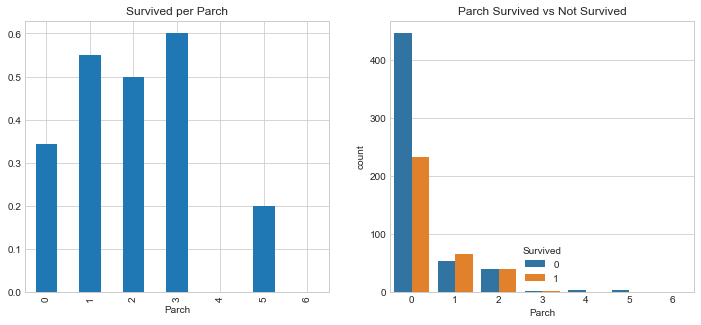

In [92]:
bag('Parch', 'Survived', 'Survived per Parch', 'Parch Survived vs Not Survived')

In [93]:
pd.crosstab([temp.Family, temp.Survived], temp.Pclass, margins=True).style.background_gradient(cmap='summer_r')

### 참조
#### 아래와 같은 방법으로 Family중 생존해 있는 사람을 찾는 방법도 있습니다. 다시 한 번 해볼 때 시도 해보세요

    # 랜덤으로 사는 사람을 만들어 봅니다
    default_survival_chance = 0.5
    data['Family_Survival'] = default_survival_chance

    # 성이 같은 사람과 요금이 같은 사람을 찾아서 가족을 찾습니다
    # 가족 중 한 사람이 살았다면 다른 사람도 살았을 확률이 크니까요
    for grp, grp_df in data[['Survived','LastName', 'NumName', 'Fare', 'Ticket', 'PassengerId',
                              'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['LastName', 'Fare']):
        
        # 1이 아니면(혼자가 아니면) 가족이 있겠지요 
        # 가족이 살았는지 확인합니다
        if (len(grp_df) != 1):
            for ind, row in grp_df.iterrows():
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin == 0.0):
                    data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 0

    # 결과보기
    print("Number of passengers with family survival information:", 
          data.loc[data['Family_Survival']!=0.5].shape[0])



      # 1이 아니면(혼자가 아니면) 가족이 발견된 것이고
      # 그룹멤버가 살았는지 봅니다
      for _, grp_df in data.groupby('Ticket'):
          if (len(grp_df) != 1):
              for ind, row in grp_df.iterrows():
                  if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                      smax = grp_df.drop(ind)['Survived'].max()
                      smin = grp_df.drop(ind)['Survived'].min()
                      passID = row['PassengerId']
                      if (smax == 1.0):
                          data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 1
                      elif (smin==0.0):
                          data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 0

      # 결과 
      print("Number of passenger with family/group survival information: " 
            +str(data[data['Family_Survival']!=0.5].shape[0]))

      # 위의 결과에서 오류가 나오면 다시 수정해 보세요

#### "Ticket"분석
* Ticket의 형태를 보겠습니다.

In [94]:
temp.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

* 도무지 감이 안 잡히는 배열입니다.
* 빈칸이 없는지 보겠습니다.

In [95]:
temp.Ticket.isnull().any()

False

* 티켓에서 영문있는 것과 숫자만 있는 것을 따봅니다.

In [96]:
temp['Initick'] = temp.Ticket.str.extract('^([A-Za-z0-9]+)')

temp = temp.reset_index(drop=True)  # 복사한 항목들을 사용하다보면 'ValueError: cannot reindex from a duplicate axis` 요런 에러가 나오는 경우가 많은데 이런 것은 요 코드로 리셋을 한 번 해주면 됩니다.

temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,113803
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36,1.0,1,373450


In [97]:
temp['Initick'] = temp.Ticket.str.extract('^([A-Za-z]+)')

In [98]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN


In [99]:
temp['NumTicket'] = temp['Initick'].factorize()[0]

In [100]:
temp.head(n=15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,...,S,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,...,C,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,...,S,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,...,S,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN,-1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,...,S,2,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN,-1
5,6,0.0,3,"Moran, Mr. James",1,32.252151,0,0,330877,8.4583,...,Q,2,Moran,5,"(30.0, 32.252]",33,1.0,1,NaN,-1
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,...,S,2,McCarthy,6,"(48.0, 80.0]",60,1.0,1,NaN,-1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,...,S,4,Palsson,7,"(0.169, 16.0]",2,NaN,5,NaN,-1
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.000000,0,2,347742,11.1333,...,S,5,Johnson,8,"(26.0, 30.0]",28,NaN,3,NaN,-1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.000000,1,0,237736,30.0708,...,C,5,Nasser,9,"(0.169, 16.0]",13,NaN,2,NaN,-1


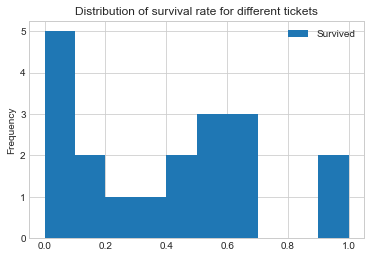

In [101]:
temp.groupby('NumTicket')['Survived'].mean().to_frame().plot(kind='hist')
plt.title('Distribution of survival rate for different tickets');

### "Fare" 분석

In [102]:
print('Highest Fare was:', temp['Fare'].max())
print('Lowest Fare was:', temp['Fare'].min())
print('Average Fare was:', temp['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 33.2954792813456


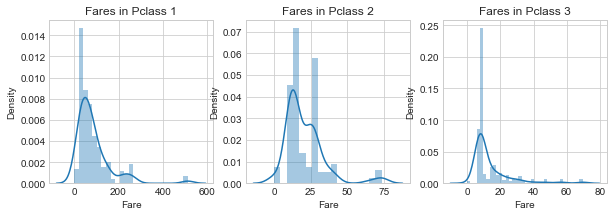

In [103]:
f,ax=plt.subplots(1, 3, figsize=(10, 3))
sns.distplot(train[train['Pclass'] == 1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass'] == 2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass'] == 3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

* Pclass1의 승객 요금에는 큰 분포가있는 것으로 보이며 불연속 값으로 변환 할 수 있습니다.
* Fare를 그룹으로 나누어 놓겠습니다.
* qcut을 활용하면 원하는 조각으로 데이터를 나누어 줍니다.
* cut와 qcut의 차이

In [104]:
def groupmean(a,b):
    return temp.groupby([a])[b].mean().to_frame().style.background_gradient(cmap='summer_r')

temp['Fare_Range'] = pd.qcut(train['Fare'], 10)
groupmean('Fare_Range', 'Fare')

,Fare
Fare_Range,
"(-0.001, 7.55]",5.928717
"(7.55, 7.854]",7.768490
"(7.854, 8.05]",7.963669
"(8.05, 10.5]",9.521367
"(10.5, 14.454]",12.940231
"(14.454, 21.679]",17.386408
"(21.679, 27.0]",25.487501
"(27.0, 39.688]",32.282186
"(39.688, 77.958]",59.444572


* Fare를 그룹화 시킵니다. Fgroup이라고 이름 짓겠습니다.

0 and below -> 0

7.125 and below-> 5.0

7.9 and below-> 7.5

8.03 or less-> 8.0

Less than 10.5-> 9.5

Less than 23-> 16.0

27.8 and below-> 25.5

51 and below-> 38

73.5 and below-> 62

Over 73.5-> 100

In [105]:
temp['Fgroup'] = 0

temp.loc[temp['Fare'] <= 0,'Fgroup'] = 0
temp.loc[(temp['Fare'] > 0) & (temp['Fare'] <= 7.125), 'Fgroup'] = 1
temp.loc[(temp['Fare'] > 7.125) & (temp['Fare'] <= 7.9), 'Fgroup'] = 2
temp.loc[(temp['Fare'] > 7.9) & (temp['Fare'] <= 8.03), 'Fgroup'] = 3
temp.loc[(temp['Fare'] > 8.03) & (temp['Fare'] < 10.5), 'Fgroup'] = 4
temp.loc[(temp['Fare'] >= 10.5) & (temp['Fare'] < 23.0), 'Fgroup'] = 5
temp.loc[(temp['Fare'] >= 23.0) & (temp['Fare'] <= 27.8), 'Fgroup'] = 6
temp.loc[(temp['Fare'] > 27.8) & (temp['Fare'] <= 51.0), 'Fgroup'] = 7
temp.loc[(temp['Fare'] > 51.0) & (temp['Fare'] <= 73.5), 'Fgroup'] = 8
temp.loc[temp['Fare'] > 73.5, 'Fgroup'] = 9

temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,...,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,...,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,...,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN,-1,"(39.688, 77.958]",8
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(7.854, 8.05]",4


### "Cabin" 분석
* cabin 의 위치에 따라 달라지는 것이 있는지 보겠습니다.

In [106]:
temp.Cabin.value_counts().head(10)

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F2                 4
C22 C26            4
F33                4
F4                 4
B96 B98            4
D                  4
C78                4
Name: Cabin, dtype: int64

In [107]:
temp.Cabin.isnull().sum()

1014

* 빈칸이 무척 많습니다.
* Cabin에 비어 있는 것이 많아 이를 다른 분류로 일단 잡고 기존 것은 이니셜로 분류합니다.
* 빈 것은 X로 구분하려는데 이 또한 1,2,3 Pclass와 연동될 것 같으니 비어있고 1등급은 X, 2등급은 Y, 3등급은 Z로 하겠습니다.

In [188]:
temp['Inicab'] = 0
temp['Inicab'] = temp['Cabin'].str.extract('^([A-Za-z]+)')
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 1)), 'Inicab'] = 'X'
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 2)), 'Inicab'] = 'Y'
temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 3)), 'Inicab'] = 'Z'
    
temp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,...,0,3,2,2,0,0,2,0,1,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,...,2,0,5,8,1,1,2,1,2,1
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,...,6,0,4,3,2,2,1,0,2,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,...,2,0,5,8,3,-1,2,0,2,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,...,0,6,2,4,4,-1,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",1,32.252151,0,0,A.5. 3236,8.0500,...,0,6,2,4,850,0,1,0,1,3
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",2,39.000000,0,0,PC 17758,108.9000,...,4,0,5,9,851,1,1,1,2,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,...,0,6,2,2,852,10,1,0,1,3
1307,1308,NaN,3,"Ware, Mr. Frederick",1,32.252151,0,0,359309,8.0500,...,0,6,2,4,799,-1,1,0,1,3


In [109]:
temp['Inicab'] = temp['Inicab'].factorize()[0]
    
temp[11:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
11,12,1.0,1,"Bonnell, Miss. Elizabeth",2,58.000000,0,0,113783,26.5500,...,11,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(21.679, 27.0]",6,1
12,13,0.0,3,"Saundercock, Mr. William Henry",1,20.000000,0,0,A/5. 2151,8.0500,...,12,"(16.0, 21.0]",18,1.0,1,A,0,"(7.854, 8.05]",4,0
13,14,0.0,3,"Andersson, Mr. Anders Johan",1,39.000000,1,5,347082,31.2750,...,13,"(33.0, 39.0]",45,NaN,7,NaN,-1,"(27.0, 39.688]",7,0
14,15,0.0,3,"Vestrom, Miss. Hulda Amanda Adolfina",2,14.000000,0,0,350406,7.8542,...,14,"(0.169, 16.0]",13,1.0,1,NaN,-1,"(7.55, 7.854]",2,0
15,16,1.0,2,"Hewlett, Mrs. (Mary D Kingcome)",2,55.000000,0,0,248706,16.0000,...,15,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(14.454, 21.679]",5,3
16,17,0.0,3,"Rice, Master. Eugene",1,2.000000,4,1,382652,29.1250,...,16,"(0.169, 16.0]",2,NaN,6,NaN,-1,"(27.0, 39.688]",7,0
17,18,1.0,2,"Williams, Mr. Charles Eugene",1,32.252151,0,0,244373,13.0000,...,17,"(30.0, 32.252]",33,1.0,1,NaN,-1,"(10.5, 14.454]",5,3
18,19,0.0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",2,31.000000,1,0,345763,18.0000,...,18,"(30.0, 32.252]",31,NaN,2,NaN,-1,"(14.454, 21.679]",5,0
19,20,1.0,3,"Masselmani, Mrs. Fatima",2,37.005848,0,0,2649,7.2250,...,19,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(-0.001, 7.55]",2,0


#### "Embarked" 분석

In [110]:
pd.crosstab([temp.Embarked, temp.Pclass], [temp.Sex, temp.Survived], margins=True).style.background_gradient(cmap='summer_r')

* 승선 장소 별로 생존 확률

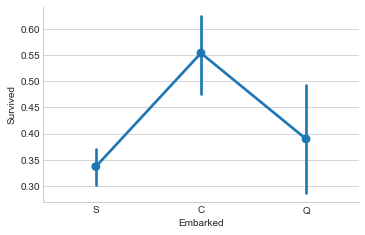

In [111]:
sns.factorplot('Embarked', 'Survived', data=temp)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

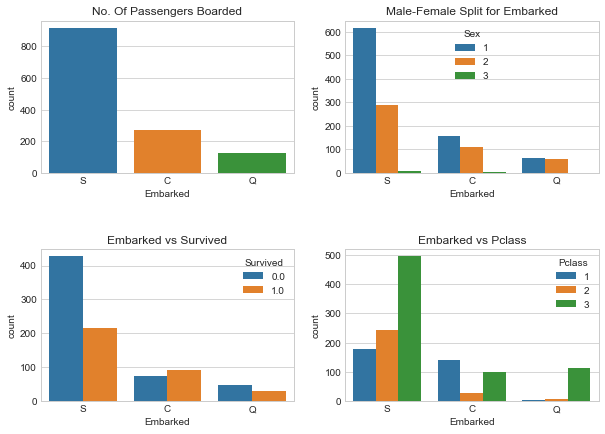

In [112]:
f,ax=plt.subplots(2,2,figsize=(10,7))
sns.countplot('Embarked', data=temp, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=temp, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=temp, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=temp, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

1) 포트 C의 생존 가능성은 0.55 정도이며 S는 가장 낮습니다.S에서 탑승 최대. 대다수는 Pclass3

2) C의 승객들은 많은 비율이 살아남았습니다. 그 이유는 Pclass1 및 Pclass2 승객이 많아서 일 것입니다

3) Embark S는 대부분의 부자들이 탑승한 항구지만 생존 가능성은 낮습니다. Pclass3의 승객도 많았습니다.

4) 포트 Q는 승객의 거의 95 %가 Pclass3

* 빈칸이 두개 있는데 보겠습니다.

In [113]:
temp.loc[(temp.Embarked.isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,62,1.0,1,"Icard, Miss. Amelie",2,38.0,0,0,113572,80.0,...,58,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(77.958, 512.329]",9,8
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.0,0,0,113572,80.0,...,616,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(77.958, 512.329]",9,8


* 두 사람의 티켓 번호가 같습니다.
* 혹시 같은 티켓 번호가 있는 다른 사람이 있는지 봅니다.

In [114]:
temp.loc[(temp.Ticket == '113572')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,62,1.0,1,"Icard, Miss. Amelie",2,38.0,0,0,113572,80.0,...,58,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(77.958, 512.329]",9,8
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.0,0,0,113572,80.0,...,616,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(77.958, 512.329]",9,8


* 가장 비슷한 번호를 찾아 보겠습니다.

In [115]:
temp.sort_values(['Ticket'], ascending = True)[55:70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
54,55,0.0,1,"Ostby, Mr. Engelhart Cornelius",1,65.000000,0,1,113509,61.9792,...,51,"(48.0, 80.0]",60,NaN,2,NaN,-1,"(39.688, 77.958]",8,8
351,352,0.0,1,"Williams-Lambert, Mr. Fletcher Fellows",1,32.252151,0,0,113510,35.0000,...,17,"(30.0, 32.252]",33,1.0,1,NaN,-1,"(27.0, 39.688]",7,1
252,253,0.0,1,"Stead, Mr. William Thomas",1,62.000000,0,0,113514,26.5500,...,217,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(21.679, 27.0]",6,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.000000,0,0,113572,80.0000,...,616,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(77.958, 512.329]",9,8
61,62,1.0,1,"Icard, Miss. Amelie",2,38.000000,0,0,113572,80.0000,...,58,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(77.958, 512.329]",9,8
802,803,1.0,1,"Carter, Master. William Thornton II",1,11.000000,1,2,113760,120.0000,...,215,"(0.169, 16.0]",13,NaN,4,NaN,-1,"(77.958, 512.329]",9,8
390,391,1.0,1,"Carter, Mr. William Ernest",1,36.000000,1,2,113760,120.0000,...,215,"(33.0, 39.0]",36,NaN,4,NaN,-1,"(77.958, 512.329]",9,8
435,436,1.0,1,"Carter, Miss. Lucile Polk",2,14.000000,1,2,113760,120.0000,...,215,"(0.169, 16.0]",13,NaN,4,NaN,-1,"(77.958, 512.329]",9,8
763,764,1.0,1,"Carter, Mrs. William Ernest (Lucile Polk)",2,36.000000,1,2,113760,120.0000,...,215,"(33.0, 39.0]",36,NaN,4,NaN,-1,"(77.958, 512.329]",9,8
185,186,0.0,1,"Rood, Mr. Hugh Roscoe",1,32.252151,0,0,113767,50.0000,...,162,"(30.0, 32.252]",33,1.0,1,NaN,-1,"(39.688, 77.958]",7,6


* 앞 뒤로 모두 S이고 Pclass도 모두 1인 것으로 봐서 S일 가능성이 큽니다.

In [116]:
temp.loc[(temp.Embarked.isnull()), 'Embarked'] = 'S'

In [117]:
temp.loc[(temp.Embarked.isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab


In [118]:
temp['Embarked'] = temp['Embarked'].factorize()[0]
    
temp[11:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
11,12,1.0,1,"Bonnell, Miss. Elizabeth",2,58.000000,0,0,113783,26.5500,...,11,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(21.679, 27.0]",6,1
12,13,0.0,3,"Saundercock, Mr. William Henry",1,20.000000,0,0,A/5. 2151,8.0500,...,12,"(16.0, 21.0]",18,1.0,1,A,0,"(7.854, 8.05]",4,0
13,14,0.0,3,"Andersson, Mr. Anders Johan",1,39.000000,1,5,347082,31.2750,...,13,"(33.0, 39.0]",45,NaN,7,NaN,-1,"(27.0, 39.688]",7,0
14,15,0.0,3,"Vestrom, Miss. Hulda Amanda Adolfina",2,14.000000,0,0,350406,7.8542,...,14,"(0.169, 16.0]",13,1.0,1,NaN,-1,"(7.55, 7.854]",2,0
15,16,1.0,2,"Hewlett, Mrs. (Mary D Kingcome)",2,55.000000,0,0,248706,16.0000,...,15,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(14.454, 21.679]",5,3
16,17,0.0,3,"Rice, Master. Eugene",1,2.000000,4,1,382652,29.1250,...,16,"(0.169, 16.0]",2,NaN,6,NaN,-1,"(27.0, 39.688]",7,0
17,18,1.0,2,"Williams, Mr. Charles Eugene",1,32.252151,0,0,244373,13.0000,...,17,"(30.0, 32.252]",33,1.0,1,NaN,-1,"(10.5, 14.454]",5,3
18,19,0.0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",2,31.000000,1,0,345763,18.0000,...,18,"(30.0, 32.252]",31,NaN,2,NaN,-1,"(14.454, 21.679]",5,0
19,20,1.0,3,"Masselmani, Mrs. Fatima",2,37.005848,0,0,2649,7.2250,...,19,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(-0.001, 7.55]",2,0


<a id = "part5"></a>
## Part 5: Feature Engineering
[Go to the Table of Contents](#table_of_contents)

* 문자를 숫자로 바꾸는 것도 Feature Engineering의 일부이나 위에서 대부분 다 했습니다.

### 항목 추가하기

* 위에 추가 항목을 몇 개 만들어 보았습니다.

* 그래도 몇 개 더 만들어 볼까요? 

* 5개 정도 만들어 봅니다.

* Priority - (1) Nobles (2) Women in Pclass 1,2 (3) Babies under 1 (4) Kids under 17 in Pclass 1 & 2  (5) High Fare / Women in Pclass 3
* FH - Female Higher Survival Group
* MH - Male Higher Survival Group
* FL - Female Lower Surival Group
* ML - Male Lower Survival Group

* Priority - (1) Nobles (2) Women in Pclass 1 (3) Babies under 1 (4) Kids under 17 in Pclass 1 & 2  (5) Women in Pclass 2 (6) Higher Fare

In [119]:
survpct('Initial')

Initial
1    0.000000
2    0.156069
3    0.454545
4    0.675676
5    0.792000
6    1.000000
Name: Survived, dtype: float64

In [120]:
survpct('Pclass')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [121]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

In [122]:
survpct('Age').head()

Age
0.17    NaN
0.33    NaN
0.42    1.0
0.67    1.0
0.75    1.0
Name: Survived, dtype: float64

In [123]:
survpct('Fgroup')

Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64

In [124]:
temp['Priority'] = 0
temp.loc[(temp['Initial'] == 6), 'Priority'] = 1
temp.loc[(temp['Pclass'] == 1) & (temp['Sex'] == 2), 'Priority'] = 2
temp.loc[(temp['Age'] < 1), 'Priority'] = 3
temp.loc[(temp['Pclass'] == 1) & (temp['Age'] <= 17), 'Priority'] = 4
temp.loc[(temp['Pclass'] == 2) & (temp['Age'] <= 17), 'Priority'] = 5
temp.loc[(temp['Pclass'] == 2) & (temp['Sex'] == 2), 'Priority'] = 6
temp.loc[(temp['Fgroup'] == 9), 'Priority'] = 7

In [125]:
survpct('Priority')

Priority
0    0.229508
1    1.000000
2    0.965517
3    1.000000
4    1.000000
5    0.818182
6    0.921053
7    0.762887
Name: Survived, dtype: float64

In [126]:
temp.Priority.value_counts()

0    978
7    145
6    105
2     52
5     16
3      7
4      4
1      2
Name: Priority, dtype: int64

In [127]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [128]:
survpct('Fgroup')

Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64

In [129]:
temp['FH'] = 0
temp.loc[(temp['Sex'] == 1), 'FH'] = 0
temp.loc[(temp['Sex'] == 2), 'FH'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 2), 'FH'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 3), 'FH'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 4), 'FH'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'FH'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'FH'] = 6
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] == 3), 'FH'] = 7
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] >= 5), 'FH'] = 8

In [130]:
survpct('FH')

FH
0    0.191710
1    0.615385
2    0.333333
3    0.000000
7    0.666667
8    0.784553
Name: Survived, dtype: float64

In [131]:
temp.FH.value_counts()

0    847
8    354
1     89
7      8
2      7
3      4
Name: FH, dtype: int64

In [132]:
temp['MH'] = 0
temp.loc[(temp['Sex'] == 2), 'MH'] = 0
temp.loc[(temp['Sex'] == 1), 'MH'] = 1
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 2), 'MH'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 3), 'MH'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 4), 'MH'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'MH'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'MH'] = 6
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] == 3), 'MH'] = 7
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] >= 5), 'MH'] = 8

In [133]:
survpct('MH')

MH
0    0.746082
1    0.094017
2    0.111111
3    0.000000
5    0.000000
6    0.000000
7    0.384615
8    0.253333
Name: Survived, dtype: float64

In [134]:
temp.MH.value_counts()

0    474
8    450
1    335
7     16
2     13
5      8
6      7
3      6
Name: MH, dtype: int64

In [135]:
temp['FL'] = 0
temp.loc[(temp['Sex'] == 1), 'FL'] = 0
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] < 5), 'FL'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] != 3), 'FL'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['FH'] == 1), 'FL'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] < 2), 'FL'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] > 4), 'FL'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'FL'] = 6

In [136]:
survpct('FL')

FL
0    0.191710
1    0.000000
2    0.809211
4    0.939394
5    0.272727
6    0.616667
Name: Survived, dtype: float64

In [137]:
temp.FL.value_counts()

0    847
2    225
6    100
4     94
5     41
1      2
Name: FL, dtype: int64

In [138]:
temp['ML'] = 0
temp.loc[(temp['Sex'] == 2), 'ML'] = 0
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] < 5), 'ML'] = 1
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] != 3), 'ML'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['MH'] <7), 'ML'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] < 2), 'ML'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] > 4), 'ML'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'ML'] = 6

In [139]:
survpct('ML')

ML
0    0.746082
1    0.333333
2    0.318966
3    0.076923
4    0.217687
5    0.034483
6    0.121212
Name: Survived, dtype: float64

In [140]:
temp.ML.value_counts()

0    474
6    372
4    224
2    176
5     41
3     19
1      3
Name: ML, dtype: int64

<a id = "part6"></a>
## Part 6: 마지막 항목 결정
[Go to the Table of Contents](#table_of_contents)

In [141]:
temp['F1'] = temp['Priority']
temp['F2'] = temp['FH']
temp['F3'] = temp['MH']
temp['F4'] = temp['FL']
temp['F5'] = temp['ML']
temp['F6'] = temp['Initial']
temp['F7'] = temp['Fgroup']
temp['F8'] = temp['NumName']
temp['F9'] = temp['NumTicket']
temp['F10'] = temp['Family']
temp['F11'] = temp['Embarked']
temp['F12'] = temp['Sex']
temp['F13'] = temp['Pclass']

* 이제 다음 단계로 갑니다.

* 두개의 새로운 데이터 프레임을 만듭니다. 하나는 레이블 인코딩 다른 하나는 원핫 인코딩 (둘이 꼭 필요한 것이 아니라 연습이나 두 가지 방 법 모두 사용해봄)

* 대표적인 인코딩에 Label Encoding이 있는데 이는 각 항목의 값을 서열화 시켜 주~욱 줄세운 것이라 생각하시면 됩니다.
* 그 외에 자주쓰는 One Hot Encoding 같은 경우 열 내에서의 항목을 나누어서 (열이 주~욱 늘어나며) 이를 0이냐 1이냐로 구분해 놓은 것입니다.

* 다시 말씀 드려서 레이블 인코딩은 줄을 세워서 번호를 부여하는 것이고, 원핫인코딩은 긴가 아닌가 두 가지입니다.

* 예를들어 나이별로 줄을 세워 너는 5번, 너는 6번이런식이 레이블 인코딩이고

* 16살이야? 1, 16살 아냐 0 ..그 다음 17살이야? 1 17살 아냐 0 ..이런 식이라 열의 수가 무지하게 늘어납니다.

In [142]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

새로운 Data Frame을 만듭니다.

In [143]:
dfl = pd.DataFrame() # for label encoding

In [144]:
good_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13']
dfl[good_columns] = temp[good_columns]

In [145]:
dfl.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,2,2,0,0,2,0,1,3
1,2,8,0,2,0,5,8,1,1,2,1,2,1
2,0,7,0,6,0,4,3,2,2,1,0,2,3
3,2,8,0,2,0,5,8,3,-1,2,0,2,1
4,0,0,1,0,6,2,4,4,-1,1,0,1,3


In [146]:
dfh = dfl.copy()

In [147]:
dfl_enc = dfl.apply(LabelEncoder().fit_transform)
                          
dfl_enc.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,1,2,0,1,1,0,0,2
1,2,5,0,2,0,4,8,1,2,1,1,1,0
2,0,4,0,5,0,3,3,2,3,0,0,1,2
3,2,5,0,2,0,4,8,3,0,1,0,1,0
4,0,0,1,0,6,1,4,4,0,0,0,0,2


In [148]:
one_hot_cols = dfh.columns.tolist()
dfh_enc = pd.get_dummies(dfh, columns=one_hot_cols)

dfh_enc.head()

,F1_0,F1_1,F1_2,F1_3,F1_4,F1_5,F1_6,F1_7,F2_0,F2_1,...,F10_11,F11_0,F11_1,F11_2,F12_1,F12_2,F12_3,F13_1,F13_2,F13_3
0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1


<a id = "part7"></a>
## Part 7:  머신러닝 모델 만들기
[Go to the Table of Contents](#table_of_contents)

* 자, 이제 머신 러닝 모델을 만들어 보지요.
* 우선 인코딩한 파일을 train과 test로 아까 구분해 놓은 행으로 쪼갭니다

In [149]:
train = dfh_enc[:ntrain]
test = dfh_enc[ntrain:]

In [150]:
X_test = test
X_train = train

In [151]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [152]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

# 리스트 준비
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores = {}

# 이어서 연속적으로 모델을 학습 시키고 교차 검증합니다.
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores[model_names[ind]] = acc

[18:30:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:30:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:30:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:30:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [153]:
# 결과 테이블을 만듭니다.
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,mean
Bagging Classifier,0.822222,0.865169,0.786517,0.865169,0.898876,0.842697,0.842697,0.797753,0.820225,0.820225,0.836155
SVC,0.833333,0.887640,0.797753,0.876404,0.865169,0.797753,0.808989,0.764045,0.865169,0.820225,0.831648
Random Forest,0.777778,0.876404,0.752809,0.887640,0.887640,0.842697,0.831461,0.775281,0.853933,0.820225,0.830587
Gradient Boosting,0.822222,0.831461,0.764045,0.876404,0.865169,0.831461,0.842697,0.797753,0.831461,0.842697,0.830537
Extra Trees,0.766667,0.853933,0.764045,0.887640,0.876404,0.853933,0.842697,0.775281,0.842697,0.831461,0.829476
Logistic Regression,0.800000,0.853933,0.797753,0.865169,0.876404,0.808989,0.820225,0.786517,0.853933,0.820225,0.828315
AdaBoost,0.811111,0.842697,0.786517,0.876404,0.853933,0.808989,0.808989,0.797753,0.820225,0.831461,0.823808
XGBoost,0.755556,0.831461,0.719101,0.887640,0.853933,0.842697,0.820225,0.775281,0.853933,0.831461,0.817129
K Nearest Neighbour,0.800000,0.797753,0.786517,0.797753,0.842697,0.786517,0.786517,0.741573,0.842697,0.831461,0.801348
Gaussian Process,0.522222,0.696629,0.539326,0.494382,0.573034,0.528090,0.426966,0.561798,0.550562,0.606742,0.549975


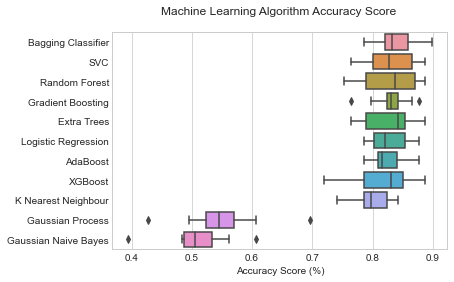

In [154]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

In [155]:
# 중요도를 보는 함수를 만듭니다.
def importance_plotting(data, xlabel, ylabel, title, n=20):
    sns.set(style="whitegrid")
    ax = data.tail(n).plot(kind='barh')
    
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    plt.show()

In [156]:
# 데이터 프레임에 항목 중요도를 넣습니다.
fi = {'Features':train.columns.tolist(), 'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)

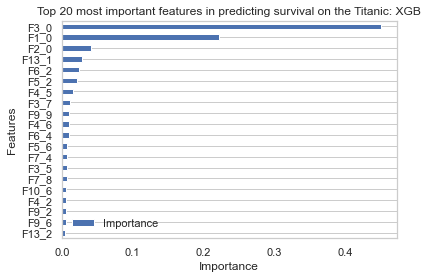

In [157]:
# 그래프 제목
title = 'Top 20 most important features in predicting survival on the Titanic: XGB'

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', title, 20)

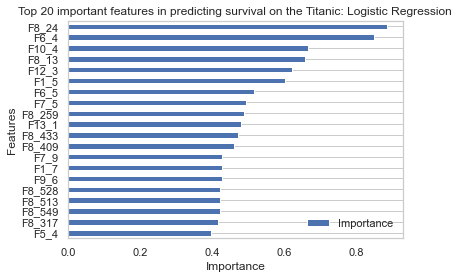

In [158]:
# 중요도를 데이터프레임에 넣습니다. Logistic regression에서는 중요도보다 coefficients를 사용합니다. 
# 아래는 Features라는 열에 트레인의 열들의 이름을 리스트로 만들어서 넣고 Importance에는 Logistic regression에는 coefficient를 바꾸어 넣어라는 넘파이 명령입니다.(즉 가로를 세로로)
fi = {'Features':train.columns.tolist(), 'Importance':np.transpose(log.coef_[0])}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)
# 그래프 타이틀
title = 'Top 20 important features in predicting survival on the Titanic: Logistic Regression'

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', title, 20)

In [159]:
# 5가지 모델에 대한 항목 중요도 얻기
gbc_imp = pd.DataFrame({'Feature':train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':train.columns, 'ada importance':ada.feature_importances_})

# 이를 하나의 데이터프레임으로
importances = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')

# 항목당 평균 중요도
importances['Average'] = importances.mean(axis=1)

# 랭킹 정하기
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

<a id = "part8"></a>
## Part 8: 중요도에 따라 모델 재 설정
[Go to the Table of Contents](#table_of_contents)

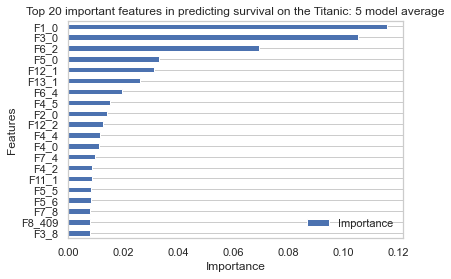

In [160]:
# 중요도를 다시 데이터 프레임에 넣기
fi = {'Features':importances['Feature'], 'Importance':importances['Average']}
importance = pd.DataFrame(fi).set_index('Features').sort_values('Importance', ascending=True)

# 그래프 타이틀
title = 'Top 20 important features in predicting survival on the Titanic: 5 model average'

# 그래프 보기
importance_plotting(importance, 'Importance', 'Features', title, 20)

In [161]:
importance1 = importance[-381:]

importance1[371:381]

,Importance
Features,
F12_2,0.012582
F2_0,0.014247
F4_5,0.015113
F6_4,0.019543
F13_1,0.026015
F12_1,0.031234
F5_0,0.033185
F6_2,0.069389
F3_0,0.105412


In [162]:
# 영양가 있는 380개만 넣기
mylist = list(importance1.index)

In [163]:
train1 = pd.DataFrame()
test1 = pd.DataFrame()

for i in mylist:
    train1[i] = train[i]
    test1[i]= test[i]
    
train1.head()

,F8_611,F8_103,F8_480,F8_386,F8_424,F8_531,F8_455,F8_111,F8_321,F8_447,...,F12_2,F2_0,F4_5,F6_4,F13_1,F12_1,F5_0,F6_2,F3_0,F1_0
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1


In [164]:
train = train1
test = test1

# 모델의 변수를 다시 정의하고
X_train = train
X_test = test

# 바꿉니다.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [165]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
svc = SVC(probability=True)
ext = ExtraTreesClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier(random_state=1)

# 리스트 준비
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores2 = {}

# 학습 및 교차 검증
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores2[model_names[ind]] = acc

[18:30:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:30:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:30:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:30:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

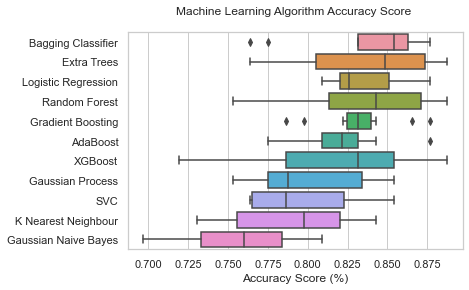

In [166]:
# 결과 테이블을 만듭니다.
results = pd.DataFrame(scores2).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
result_df.head(11)
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

<a id = "part9"></a>
## Part 9: 하이퍼 파라미터 튜닝
[Go to the Table of Contents](#table_of_contents)

### SVC
* Scikit-Learn에서는 3가지 모형 최적화 도구를 지원하는데 validation_curve/ GridSearchCV/ ParameterGrid이다
* fit 메소드를 호출하면 grid search가 자동으로 여러개의 내부 모형을 생성하고 이를 모두 실행시켜서 최적 파라미터를 찾는다.

* bestscore는 최고 점수이고 best estimator는 최고 점수를 낸 파라미터를 가진 모형
* c값과 gamma값은 10의 배수로 일반적으로 한다.
* 감마 매개 변수는 단일 학습 예제의 영향이 도달하는 정도를 정의하며 낮은 값은 'far'를, 높은 값은 'close'를 나타냅니다. 감마 매개 변수는 서포트 벡터로 모델에 의해 선택된 샘플의 영향 반경의 역으로 볼 수 있습니다.
* C 매개 변수는 의사 결정 표면의 단순성에 대한 훈련 예제의 오 분류를 제거합니다. C가 낮을수록 결정 표면이 매끄럽고 높은 C는 모델이 더 많은 샘플을 서포트 벡터로 자유롭게 선택할 수 있도록하여 모든 학습 예제를 올바르게 분류하는 것을 목표로합니다.
* Verbose는 불리안 값으로 True로 넣으면 꼬치 꼬치 다 알려주는데, 대신 시간이 좀 더 오래 걸립니다.
* cv =5는 5 fold로 교차 검증한다는 뜻입니다.

In [167]:
# 파라미터 서치
Cs = [0.01, 0.1, 1, 5, 10, 15, 20, 50]
gammas = [0.001, 0.01, 0.1]

# 파라미터 그리드 셋팅
hyperparams = {'C': Cs, 'gamma' : gammas}

# 교차검증
gd=GridSearchCV(estimator = SVC(probability=True), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

# 모델 fiting 및 결과
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.8383717280773336
{'C': 10, 'gamma': 0.001}


### Gradient Boosting Classifier
* learning_rate는 각 트리의 기여를 줄이는 역할을 합니다.
* n_estimator는 각 경우의 트리 숫자입니다.

In [168]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5]
n_estimators = [100, 1000, 2000]
max_depth = [3, 5, 10, 15]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
0.839507877722679
{'learning_rate': 0.05, 'n_estimators': 1000}


### Logistic Regression
* Penalty - L1 을 사용하는 회귀 모델을 Lasso Regression이라고하고 L2를 사용하는 모델을 Ridge Regression이라고합니다. 이 둘의 주요 차이점은 페널티입니다. 릿지 회귀는 손실 함수에 페널티 항으로 계수의 "제곱 크기"를 추가합니다. L2-norm이 오차를 제곱하기 때문에 (오류> 1 인 경우 로트가 증가 함) 모델은 L1-norm보다 훨씬 큰 오차 (e vs e ^ 2)를 보게되므로 훨씬 더 민감합니다. 따라서 오류를 최소화하기 위해 모델을 조정해줍니다.
* C는 estimator 입니다. logspace 1차원 10개 배열로 0에서 4까지를 estimator로 놓은 것입니다.

In [169]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

hyperparams = {'penalty': penalty, 'C': C}

gd=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.8294269035214361
{'C': 2.7825594022071245, 'penalty': 'l2'}


### XGBoost Step 1.

In [170]:
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 50, 100, 250, 500, 1000]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = XGBClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[18:34:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8294331805913
{'learning_rate': 0.1, 'n_estimators': 10}


### XGB Step 2.

In [171]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
min_child_weight = [1, 2, 3, 4, 5, 6]

hyperparams = {'max_depth': max_depth, 'min_child_weight': min_child_weight}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[18:34:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8361433682756889
{'max_depth': 7, 'min_child_weight': 5}


### XGB Step 3.

In [172]:
gamma = [i*0.1 for i in range(0,5)]

hyperparams = {'gamma': gamma}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[18:34:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8283095850856819
{'gamma': 0.0}


### XGB Step 4

In [173]:
subsample = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
    
hyperparams = {'subsample': subsample, 'colsample_bytree': colsample_bytree}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[18:34:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8294080723118448
{'colsample_bytree': 0.65, 'subsample': 0.75}


### XGB Step 5

In [174]:
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
    
hyperparams = {'reg_alpha': reg_alpha}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0, subsample=1, colsample_bytree=1),
                                         param_grid = hyperparams, verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[18:34:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8283095850856819
{'reg_alpha': 1e-05}


### Gaussian Process

In [175]:
n_restarts_optimizer = [0, 1, 2, 3]
max_iter_predict = [1, 2, 5, 10, 20, 35, 50, 100]
warm_start = [True, False]

hyperparams = {'n_restarts_optimizer': n_restarts_optimizer, 'max_iter_predict': max_iter_predict, 'warm_start': warm_start}

gd=GridSearchCV(estimator = GaussianProcessClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
0.8013495700207143
{'max_iter_predict': 1, 'n_restarts_optimizer': 0, 'warm_start': True}


### Adaboost.

In [176]:
n_estimators = [10, 100, 200, 500]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

hyperparams = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

gd=GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
0.838359173937606
{'learning_rate': 0.5, 'n_estimators': 200}


### KNN

In [177]:
n_neighbors = [1, 2, 3, 4, 5]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10]

hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
0.8215805661917018
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}


### Random Forest.

In [178]:
n_estimators = [10, 50, 100, 200]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 6]
min_samples_leaf = [2, 6]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
0.8361308141359615
{'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 50}


### Extra Trees

In [179]:
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 10]
min_samples_leaf = [2, 10]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
0.8361308141359614
{'max_depth': None, 'max_features': 0.2, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 75}


### Bagging Classifier

In [180]:
n_estimators = [10, 50, 75, 100, 200]
max_samples = [0.1, 0.2, 0.5, 0.8, 1.0]
max_features = [0.1, 0.2, 0.5, 0.8, 1.0]

hyperparams = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features}

gd=GridSearchCV(estimator = BaggingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
0.8428661100998054
{'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 100}


<a id = "part10"></a>
## Part 10: 모델 재 트레이닝
[Go to the Table of Contents](#table_of_contents)

In [181]:
# 튜닝 모델 시작
# sample을 split하는 것은 전체데이터 80%를 트레인셋에 20%는 테스트셋에 줌  
ran = RandomForestClassifier(max_depth=None, max_features=0.1, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=1)

knn = KNeighborsClassifier(leaf_size=1, n_neighbors=3, weights='distance')

log = LogisticRegression(C=59.94842503189409, penalty='l2')

xgb = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0, subsample=1, colsample_bytree=1, reg_alpha=1e-05)

gbc = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=1000)

svc = SVC(probability=True, gamma=0.001, C=1)

ext = ExtraTreesClassifier(max_depth=None, max_features=0.1, min_samples_leaf=2, min_samples_split=10, n_estimators=75, random_state=1)

ada = AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=1)

gpc = GaussianProcessClassifier(max_iter_predict=1, n_restarts_optimizer=0, warm_start=True)

bag = BaggingClassifier(max_features=0.5, max_samples=1.0, n_estimators=10, random_state=1)

# 리스트
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores3 = {}

# Sequentially fit and cross validate all models
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores3[model_names[ind]] = acc

[18:37:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

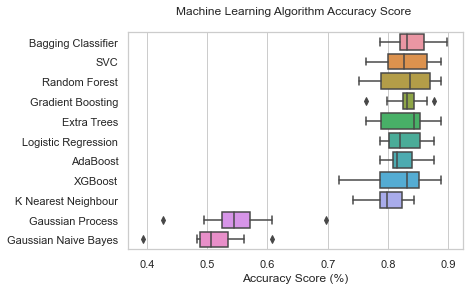

In [182]:
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)
result_df = results.sort_values(by='mean', ascending=False)
result_df.head(11)


result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

<a id = "part11"></a>
## Part 11: 마지막 보팅
[Go to the Table of Contents](#table_of_contents)

In [183]:
#튜닝한 파라미터로 하드보팅
grid_hard = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, y_train, cv=10)
grid_hard.fit(X_train, y_train)

print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean() * 100))

[18:38:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [184]:
grid_soft = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train, y_train, cv=10)
grid_soft.fit(X_train, y_train)

print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean() * 100))

[18:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<a id = "part12"></a>
## Part 12: 마지막 모델 예측
[Go to the Table of Contents](#table_of_contents)

In [185]:
# Final predictions2
predictions = grid_hard.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('titanic_submission1.csv', header = True, index = False)

In [186]:
# Final predictions
predictions = grid_soft.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('titanic_submission2.csv', header = True, index = False)

<a id = "part13"></a>
## Part 13: 제출
[Go to the Table of Contents](#table_of_contents)

In [187]:
# And we finally make a submission 그리고 제출 합니다.
# Please make sure you "commit" (It take a few minutes) / commit버턴을 누르시는 것을 잊지 마세요 (몇 분 걸립니다)
# And then you will see the submission file on the top right hand side at Data>Output>Kaggle/working / 그럼 우측 상단 데이터 아웃풋에서 제출용 결과물이 나올 것입니다.

* 온라인 수업의 "평생소장"이라는 특성상 공식적으로 평생 질문을 받는다는 것은 불가능하여 공식적으로는 질문에 답을 할 수가 없습니다. 하지만 해당 내용에 질문이 있으시면 "개인 차원"에서 담당자가 답을 해 드릴 예정입니다. 최초 복사해가신 캐글 커널의 한국판으로 만든 것 https://www.kaggle.com/joshuajhchoi/titanic-tutorial-for-beginners-2020 제일 아래에 질문을 남겨 주시면 최대한 빨리 답을 드리겠습니다. 단 다시 말씀 드리지만 공식적으로는 답을 해 드릴 의무는 없음을 알려 드립니다.  하지만 비공식적으로는... 그리고 다른 분들이 답을 드리는 경우도 많습니다.



* 기타 팁 

- Pclass와 Sex를 합하여 나눈 모델은 점수의 아주 약간의 상승에 도움이 되었습니다.

- 역시 Part 4에서 Family관련하여 나눈 "참조" 부분을 사용하시면 점수가 살짝 올랐습니다.

- 이 모델에서는 Label Encoding보다 On-Hot Encoding으로 작업을 한 것이 항상 점수가 약간이라도 높았습니다

- 마지막으로 안드레이가 준 이 노트북에서 끝에 Confusion Matrix를 적용하니 살 확률이 낮은 사람 중에 생존한 사람들을 사망자로 분류한 비율이 높아서 사망자들 중 랜덤으로 2%정도를 살게하니 상위 3% 안으로 올라갈 수 있었습니다. (대신 random이니 항상 그런 것은 아니지요) 한번 이런 저런 방법으로 try해보세요. 고쳐 본 것은 https://www.kaggle.com/joshuajhchoi/titanic-tutorial-how-to-be-in-top3 에서 보실 수 있습니다. (물론 좋은 방법이라고 말하기는 좀 그렇지만....)


* [조대협님의 블로그를 보시고 confusion matrix 참조 하세요](https://bcho.tistory.com/1206)

- 이렇듯 기존에 copy한 노트북을 수정하여 더 좋은 결과를 만드시고 다른 분들이 이를 다시 복사 및 수정해서 더 좋은 결과를 만드는 것이 캐글의 매력입니다

* 계속 try하세요

수고하셨습니다